# Using the K-NN algorithm for classification of iris

In this assigment, you will classify if an Iris is 'Iris Setosa' or 'Iris Versicolour' or 'Iris Virginica' using the k nearest neighbor algorithm.

The training data is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/iris.  Please download the dataset before running the code below.

## Step 1:  Getting, understanding, and cleaning the dataset


###  Importing the dataset


In [29]:
# Import the usual libraries
import matplotlib.pyplot as plt # plotting utilities
%matplotlib inline
import numpy as np
import pandas as pd  # To read in the dataset we will use the Panda's library
from collections import Counter
df = pd.read_csv('/content/iris.data', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width[cm]", "label"])

# Next we observe the first 5 rows of the data to ensure everything was read correctly
df.head()

,sepal length[cm],sepal width[cm],petal length[cm],petal width[cm],label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data preprocesssing
It would be more convenient if the labels were integers instead of 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.  This way our code can always work with numerical values instead of strings.

In [30]:
df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})
df.head()# Again, lets observe the first 5 rows to make sure everything worked before we continue

,sepal length[cm],sepal width[cm],petal length[cm],petal width[cm],label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
# This time we will use sklearn's method for seperating the data
from sklearn.model_selection import train_test_split
names = ["sepal length[cm]","petal width[cm]"]
#After completing the assignment, try your code with all the features
#names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width"]
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], random_state=0)

X_train=df_X_train.to_numpy()
X_test=df_X_test.to_numpy()
y_train=df_y_train.to_numpy()
y_test=df_y_test.to_numpy()

#Looking at the train/test split
print("The number of training examples: ", X_train.shape[0])
print("The number of test exampels: ", X_test.shape[0])

print("The first four training labels")
print(y_train[0:4])

print("The first four iris' measurements")
print(X_test[0:4])

The number of training examples:  112
The number of test exampels:  38
The first four training labels
[1 1 2 0]
The first four iris' measurements
[[5.8 2.4]
 [6.  1. ]
 [5.5 0.2]
 [7.3 1.8]]


## visualizing the data set

We will look plot the points using only two of the features

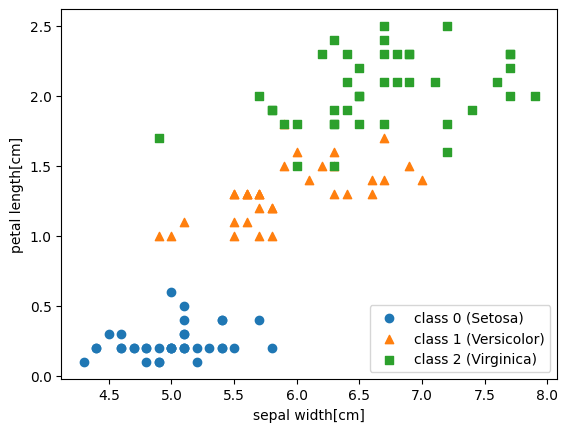

In [32]:
plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker='o',
            label='class 0 (Setosa)')

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='^',
            label='class 1 (Versicolor)')

plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker='s',
            label='class 2 (Virginica)')

plt.xlabel('sepal width[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='lower right')

plt.show()

# Your code goes here

In [33]:
def euclidean_distance(x1, x2):
  #### TO-DO #####
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance
  ##############


In [34]:
def manhattan_distance(x1, x2):
    distance = np.sum(np.abs(x1 - x2))
    return distance

In [35]:
def get_neighbors(X_train, y_train, x_test, k, dist_func=euclidean_distance):
  #### TO-DO #####
    clf = KNN(k, dist_func)
    clf.fit(X_train, y_train)

    # Predict using the trained model
    predictions = clf.predict(X_test)

    # Calculate accuracy
    acc = np.sum(predictions == y_test) / len(y_test)

    # Find misclassified examples
    p = np.array(predictions)
    mis_idx = np.where(p != y_test)[0]
    mis_examples = X_test[mis_idx]

    return acc, mis_examples
  ##############

In [36]:
class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        if self.distance_metric == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'manhattan':
            distances = [manhattan_distance(x, x_train) for x_train in self.X_train]

        # Compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [37]:
# Define the values of k
k_values = [1, 3, 5]
i = 1
for k in k_values:
    acc, mis_examples = get_neighbors(X_train, y_train, X_test, k,'euclidean')

    print(f" Ans.{i}) For k = {k}")
    print(f" Misclassified Examples: \n {mis_examples}\n")
    print(f" Ans.{i+1})Accuracy for k = {k}: {acc}\n")
    i+=2

most_common_class = np.bincount(y_train).argmax()
print(f" Ans.7) Most Common Class in the Training Set = {most_common_class}")
correct_predictions = np.sum(y_test == most_common_class)
accuracy = correct_predictions / len(y_test)
print(f"  Resulting Accuracy through Zero-R classifier = {accuracy}\n")



print(f" Ans.8) Using a different distance metric :-")
for k in k_values:
    acc, mis_examples = get_neighbors(X_train, y_train, X_test, k,'manhattan')

    print(f" Accuracy for k = {k}: {acc}\n")
print(f" The Iris dataset has only four simple features and doesn't involve complex patterns.\n The Euclidean distance, which calculates straight-line distances, works really well for this dataset.\n Since it's not a high-dimensional dataset, we don't face the usual problems of high-dimensional spaces.\n So, trying Manhattan distance, which measures block-like distances, doesn't make a big difference in accuracy.")



print(f" \nAns.9) 5-fold cross-validation:-")
# Define the number of neighbors for KNN
k_values = [3, 7, 9]

# Define the number of folds for cross-validation
folds = 5

# Calculate the size of each fold
fold_size = len(X_train) // folds

avg_accs = {}

# Perform cross-validation for each value of k
for k in k_values:
    print(f'Five Fold Cross-Validation for k = {k}')

    # Initialize a list to store fold accuracies for this k
    fold_accuracies = []

    # Perform five-fold cross-validation
    for fold in range(folds):
        # Calculate the start and end indices for the current fold
        start_index_test = fold * fold_size
        end_index_test = (fold + 1) * fold_size if fold < folds - 1 else len(X_train)

        # The test set for this fold
        X_test_fold = X_train[start_index_test:end_index_test]
        y_test_fold = y_train[start_index_test:end_index_test]

        # The training set for this fold (combine all sets except the test set)
        X_train_fold = []
        y_train_fold = []
        for i in range(folds):
            if i != fold:  # Exclude the current test set
                start_index_train = i * fold_size
                end_index_train = (i + 1) * fold_size if i < folds - 1 else len(X_train)
                X_train_fold.extend(X_train[start_index_train:end_index_train])
                y_train_fold.extend(y_train[start_index_train:end_index_train])
        X_train_fold = np.array(X_train_fold)
        y_train_fold = np.array(y_train_fold)

        # Initialize your KNN classifier (MyKNNClassifier) with the current value of k
        clf = KNN(k, distance_metric= 'euclidean')

        # Fit the KNN classifier on the training data for this fold
        clf.fit(X_train_fold, y_train_fold)

        # Make predictions on the test data for this fold
        predictions = clf.predict(X_test_fold)

        # Calculate accuracy for this fold and append it to the list
        accuracy = np.sum(predictions == y_test_fold) / len(y_test_fold)
        fold_accuracies.append(accuracy)

        print(f' Accuracy for k for the {fold} fold = {k}: {accuracy}')
    avg_acc = np.mean(fold_accuracies)
    avg_accs[k] = avg_acc
    print(f" Mean Accuracy : {avg_acc}")

best_k_index = max(avg_accs, key=avg_accs.get)
best_accu_for_k = avg_accs[best_k_index]
print(f' \nThe value of k that works best in this case is = {best_k_index} with an accuracy of {best_accu_for_k}')

 Ans.1) For k = 1
 Misclassified Examples: 
 [[6.1 1.4]
 [6.  1.5]]

 Ans.2)Accuracy for k = 1: 0.9473684210526315

 Ans.3) For k = 3
 Misclassified Examples: 
 [[6.1 1.4]]

 Ans.4)Accuracy for k = 3: 0.9736842105263158

 Ans.5) For k = 5
 Misclassified Examples: 
 [[6.1 1.4]]

 Ans.6)Accuracy for k = 5: 0.9736842105263158

 Ans.7) Most Common Class in the Training Set = 2
  Resulting Accuracy through Zero-R classifier = 0.23684210526315788

 Ans.8) Using a different distance metric :-
 Accuracy for k = 1: 0.9473684210526315

 Accuracy for k = 3: 0.9736842105263158

 Accuracy for k = 5: 0.9736842105263158

The Iris dataset has only four simple features and doesn't involve complex patterns.
 The Euclidean distance, which calculates straight-line distances, works really well for this dataset.
 Since it's not a high-dimensional dataset, we don't face the usual problems of high-dimensional spaces.
 So, trying Manhattan distance, which measures block-like distances, doesn't make a big diffe